<a href="https://colab.research.google.com/github/hanaforoosh/apollo/blob/master/Source%5CClustringandModularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import networkx as nx
import networkx.algorithms.isomorphism as iso
import pickle
from functools import reduce
import community as community_louvain
import matplotlib.pyplot as plt

Load Data

In [0]:
ctrl = pickle.load(open('ctrl.p','rb'))
planning = pickle.load(open('planning.p','rb'))

239
0.8004113779402975
[{'ADCCurrentInfo', 'FeatureGenerator'}, {'Spline1dSolver', 'Spline2dConstraint', 'Spline2dSolver', 'Spline1dKernel', 'OsqpSpline1dSolver', 'Spline1dConstraint', 'ActiveSetSpline2dSolver', 'Spline2dKernel', 'OsqpSpline2dSolver', 'AffineConstraint', 'ActiveSetSpline1dSolver', 'Spline1d', 'Spline2d'}, {'AutotuningSpeedMLPModel', 'AutotuningBaseModel'}, {'AutotuningSpeedFeatureBuilder', 'AutotuningFeatureBuilder'}, {'BoundaryType', 'SunnyvaleLoopTest', 'Task', 'BacksideVehicle', 'Smoother', 'PublishableTrajectory', 'NaviSpeedTsGraph', 'DpRoadGraph', 'ConstantDecelerationTrajectory1d', 'SunnyvaleBigLoopTest', 'NavigationModeTest', 'OpenSpaceTrajectoryPartition', 'QuinticSpiralPathWithDerivation', 'StBoundaryMapperTest', 'OnLanePlanning', 'StandingStillTrajectory1d', 'OpenSpaceInfoTest', 'IndexedList', 'PathOptimizer', 'PathTimeHeuristicOptimizer', 'TrafficLight', 'Curve1d', 'GearSwitchStates', 'WaypointSampler', 'PlanningTestBase', 'Frame', 'SpeedOptimizer', 'NaviPla

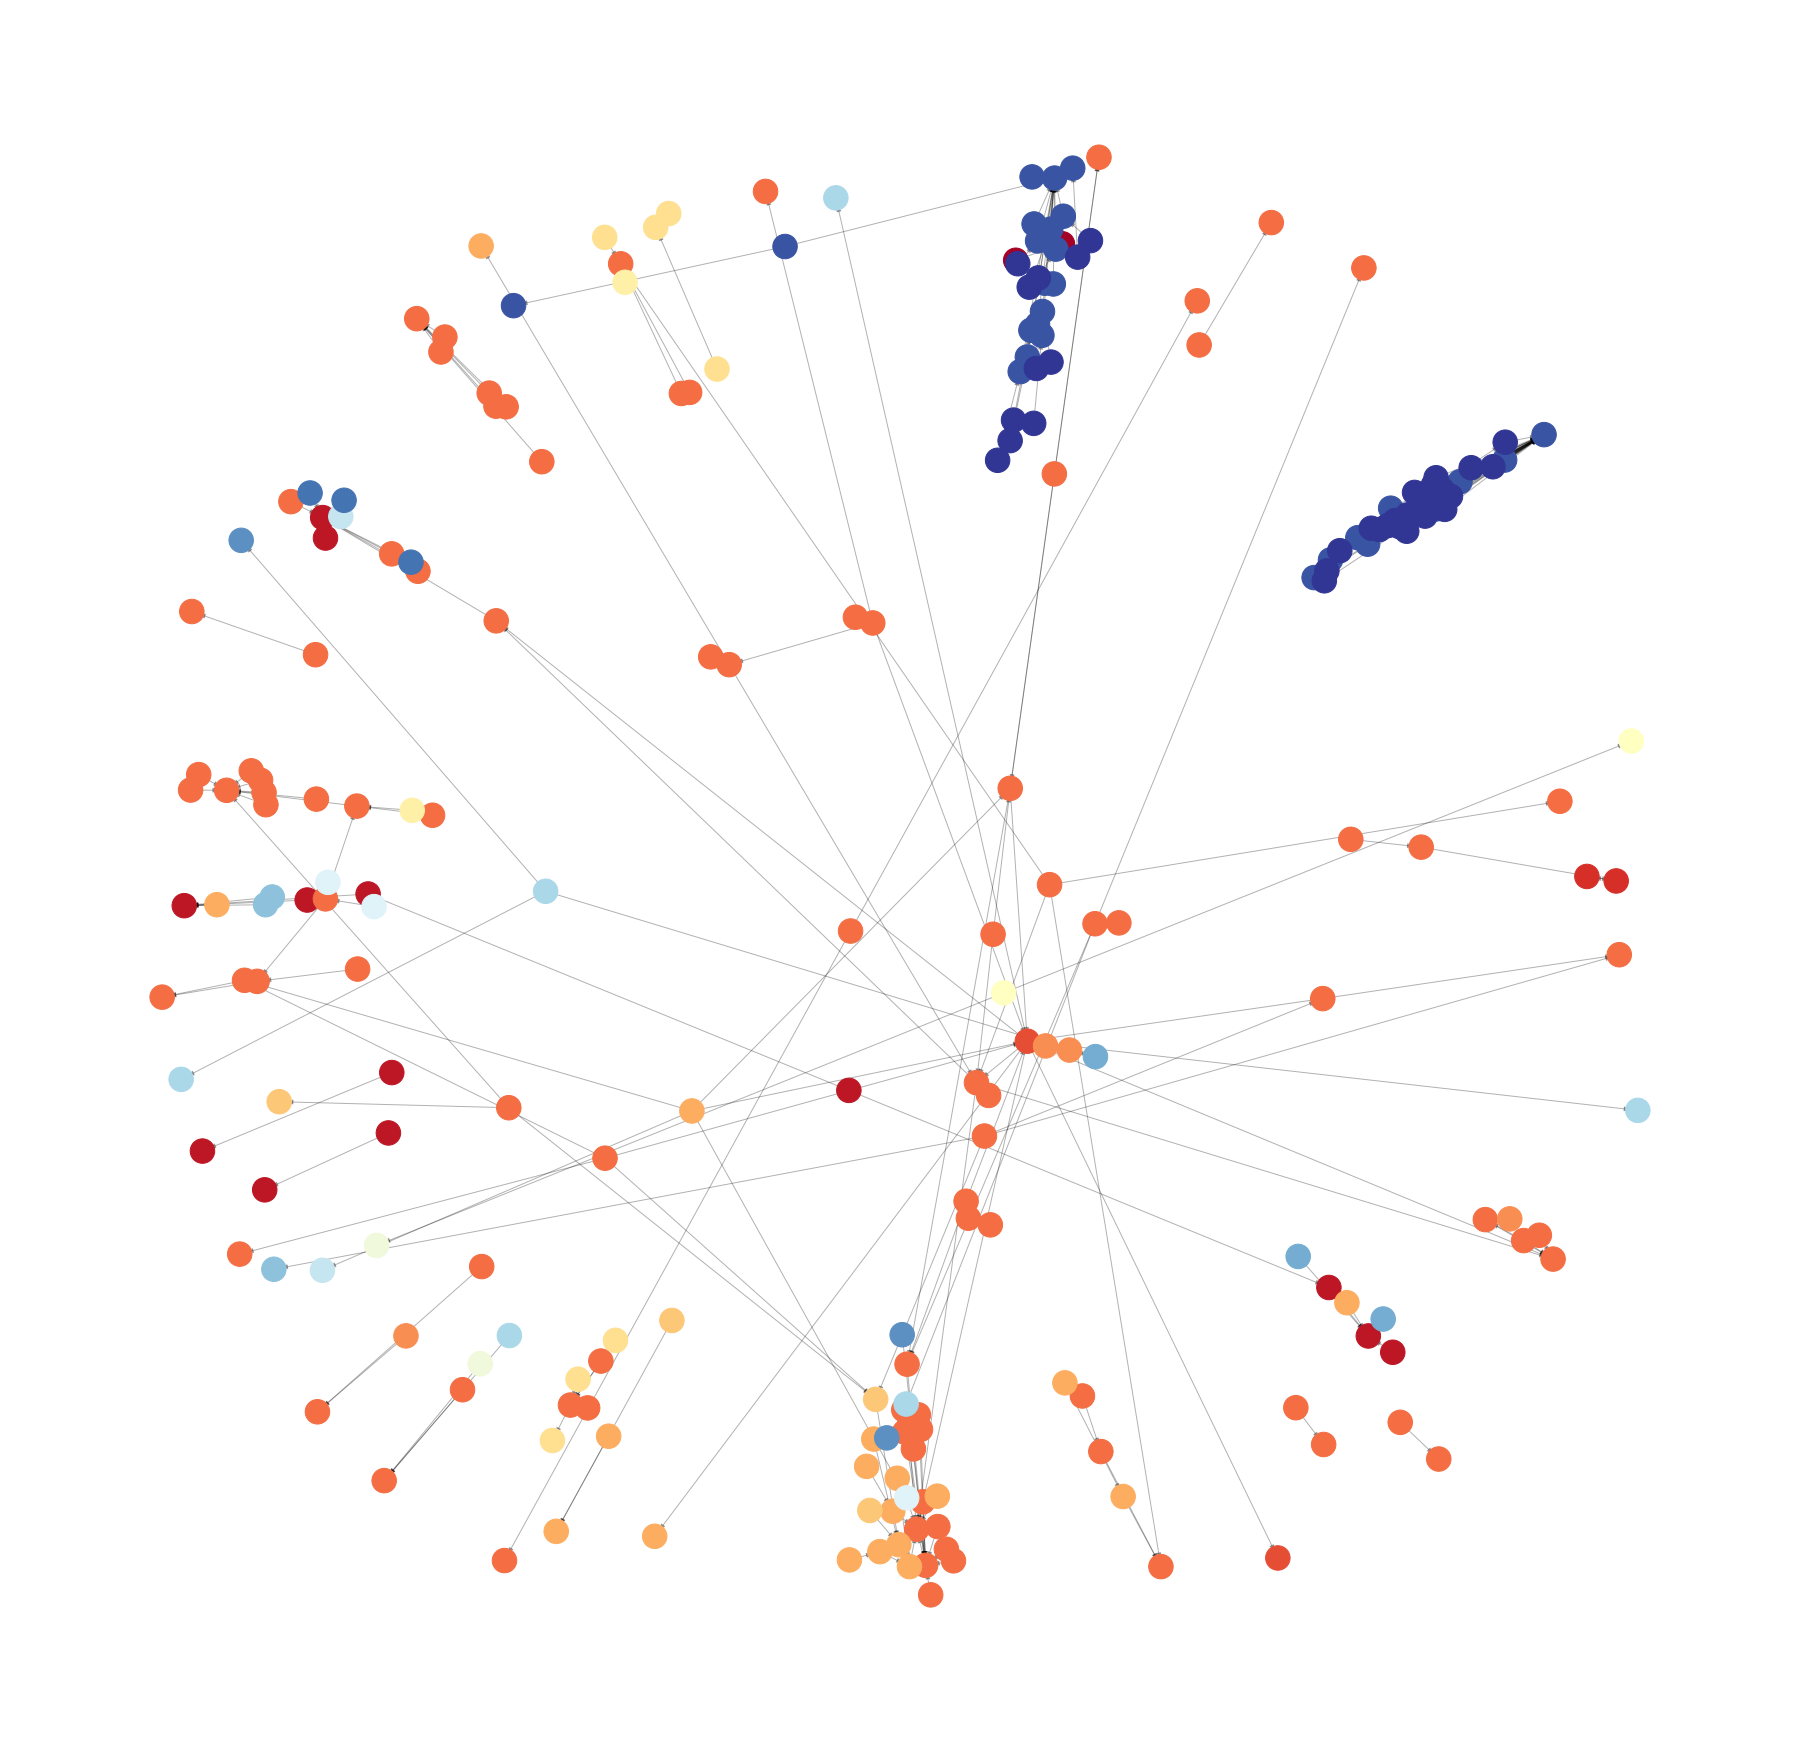

In [118]:
from networkx.algorithms import community
G = planning
partition=community.girvan_newman(G)

print(len(G.nodes))

pos=nx.spring_layout(G)
plt.figure(figsize=(32, 32))
plt.axis('off')

communities=next(partition)

print(nx.community.quality.performance(G,communities))

l=list(communities)
maped=map(l)
print (l)
nx.draw_networkx_nodes(G, pos, node_size=600, cmap=plt.cm.RdYlBu,node_color=maped)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show(G)

In [0]:
def map(l):
  results=[]
  step=0
  for cluster in l:
    for item in cluster:
      results.append(step)
    step+=1
  return results

In [0]:
!wget  ctrl.p https://www.dropbox.com/s/tizepve27132kr6/ctrl_graph.p?dl=0
!wget  planning.p https://www.dropbox.com/s/rca7zuydbhi9ev5/planning_graph.p?dl=0